In [1]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
from wooldridge import *

In [2]:
datos=dataWoo("hprice1")
y=datos["lprice"]
vars=["llotsize", "lsqrft", "bdrms"]
X=datos[vars]

mco1 = sm.OLS(y, sm.add_constant(X)).fit()
mco1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     50.42
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           9.74e-19
Time:                        08:45:54   Log-Likelihood:                 25.861
No. Observations:                  88   AIC:                            -43.72
Df Residuals:                      84   BIC:                            -33.81
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2970      0.651     -1.992      0.050      -2.592      -0.002
llotsize       0.1680      0.038      4.388      0.000       0.092       0.244
lsqrft         0.7002      0.093      7.540      0.000       0.516       0.885
bdrms          0.0370      0.028      1.342      0.183      -0.018       0.092
==============================================================================
Omnibus:                       12.060   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               34.889
Skew:                          -0.188   Prob(JB):                     2.65e-08
Kurtosis:                       6.062   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Linealidad: Harvey-Collier

In [4]:
import statsmodels.stats.diagnostic as diagn #Para el test de Harvey-Collier

diagn.linear_harvey_collier(mco1) # si nuestro alpha es menor que el p valor, hay linelidad, no se rechaza hipotesis nula

Ttest_1sampResult(statistic=-0.5552330355332921, pvalue=0.5802109277121466)

# Normalidad de los Residuos

- Jarque-Bera: Test de hipótesis que contrasta si los datos de la muestra tienen el coeficiente de simetría y la curtósis de una distribución normal.
- $\chi^2$ (p-valor): p-valor del Test de Jaque-Bera.
- Skew: Coeficiente de Simetría de pearson de los residuos.
- Kurtosis: Coeficiente de apuntamiento de los residuos.
- Komogorov-Smirnov: Test de Hipótesis para contrastar si una muestra proviene de una distribución (en este caso normal).

In [8]:
import statsmodels.stats.api as sms
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(mco1.resid)
for i in range(4):
    print(name[i], test[i]) # para rechazar hipotesis nula de normalidad, tine que ser el pvlor mas cihco que 0.05 nuestro alpha
                            # para que sea simetrica tiene que ser 0 la skew
                            # para que la kurtosis sea normal tiene que ser de 4, es de 6 a asi que bueno

Jarque-Bera 34.889445828407624
Chi^2 two-tail prob. 2.653707794334599e-08
Skew -0.18756944389904812
Kurtosis 6.061792648532742


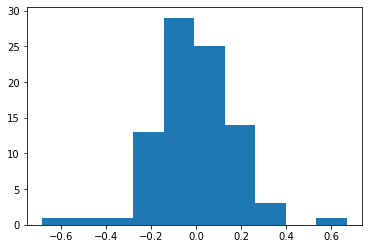

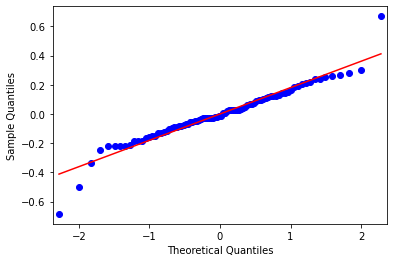

In [10]:
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot
pyplot.hist(mco1.resid)
pyplot.show()
qqplot(mco1.resid, line='s')
pyplot.show()  # si los datos fueran normales estarian encima de mi linea roja, a si que no esta mal del todo

In [5]:
import statsmodels.stats.diagnostic as diag

diag.kstest_normal(mco1.resid) # kormorogof smirnov, primero es estadistico y el segundo el pvalor, por lo que al ser mas grande que 0.05 no rechazo H0
                                # residuos normales

(0.06649909936772998, 0.48573382397459336)

# Bootstrap

In [11]:
datos=dataWoo("hprice1")
y=datos["lprice"]
vars=["llotsize", "lsqrft", "bdrms"]
X=datos[vars]

mco1=sm.OLS(y, sm.add_constant(X)).fit()


# procedimiento que se utiliza cuandoe n caso de que no se cumplan las hipotesis para 
# poder tomar conclusiones, como contrsuir intervslos de confianza para mis estamidadores
# el intervalo de confianza es entre que valores esta mi b gorrito

# la idea es , cogete tu base de atos y cogete una muestra y calcula el estimador de MCO
# al repetir muchas veces tengo muchos estimadroes, cada vez que tengo datos distintos
# cambiando los datos que cojo de mi modelo me dan unas betas distintas

# al final acabo con una lista de B gorrito, con esa informacion construyo intervaos de confianza
# normalmente se cogen  los que son mas grande que el 5% y los mas chicos que el 95% alpha = 10%

# es una forma de obtener intrvalos de confianza
from random import choices

beta=[]
n=len(y)
for it in range(10000): #repetimos 1000 veces la estimacion
    I=choices(list(range(n)), k=n) # elegimos una muestra con repeticion de los datos
    mco3 = sm.OLS(y[I], sm.add_constant(X.values[I,:])).fit() #ajustamos el modelo
    beta.append(list(mco3.params)) # guardamos los coeficientes
beta=np.array(beta)
k=len(X.T)+1
for i in range(k):
    q025=np.percentile(beta[:,i], 2.5) #percentil 2.5%
    q975=np.percentile(beta[:,i], 97.5) #percentil 97.5%
    media=np.mean(beta[:,i]) #media de los betas
    sd=np.std(beta[:,i]) #desviación tipica de los betas
    print(i, media,[q025, q975])
    

0 -1.3326430885568321 [-2.9895187041585287, 0.09781590492521465]
1 0.1814887161980892 [0.10860765095478984, 0.3193735479339724]
2 0.689833696284368 [0.4627633837338092, 0.9254225369813796]
3 0.03506140711107631 [-0.03544098431624962, 0.08864734780471673]


In [7]:
mco1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     50.42
Date:                Sun, 28 Nov 2021   Prob (F-statistic):           9.74e-19
Time:                        18:56:12   Log-Likelihood:                 25.861
No. Observations:                  88   AIC:                            -43.72
Df Residuals:                      84   BIC:                            -33.81
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2970      0.651     -1.992      0.050      -2.592      -0.002
llotsize       0.1680      0.038      4.388      0.000       0.092       0.244
lsqrft         0.7002      0.093      7.540      0.000       0.516       0.885
bdrms          0.0370      0.028      1.342      0.183      -0.018       0.092
==============================================================================
Omnibus:                       12.060   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               34.889
Skew:                          -0.188   Prob(JB):                     2.65e-08
Kurtosis:                       6.062   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""